### Data collection

This notebook is used to collect data on polynomials that have low Mahler measure.

In [2]:
# imports
import pandas as pd
import csv
import matplotlib

In [3]:
matplotlib.rcParams["font.size"] = 20

This is more of a temporary solution, but I'm going to paste the code from the sage file here since I can't import it as a Python module:

In [4]:
def boundedReciprocalPolys(d, M):
    possiblePoly = []
    assert d % 2 == 0
    n = d / 2
    # create a ring to make polynomials (for testing whether the polynomial is reducible)
    R.<x> = PolynomialRing(QQ)
    # calculate the bounds for each coefficient
    bounds = [M * binomial(d, i) for i in range(0, n+1)]
    # this line is for testing v
    # print("bounds: ")
    # print(bounds)

    # this is done to account for the fact that the xmrange function always starts at 0
    tempBounds = [2 * bound + 1 for bound in bounds]
    print("something")
    possibleCoef = list(xmrange(tempBounds))
    
    print("test")

    # shift the values back to fix the coefficients, and add the remaining coefficients
    # (for the terms of degree n + 1 or higher)
    # these are known since the polynomial is reciprocal
    for coefs in possibleCoef:
        fixedCoefs = [int(coefs[i] - bounds[i]) for i in range(len(bounds))]
        remainingCoefs = [fixedCoefs[n - (i + 1)] for i in range(n)]
        fixedCoefs.extend(remainingCoefs)
        possiblePoly.append(fixedCoefs)

    # filter out all the polynomials with 0 as the first coefficient (since this would mean the
    # degree of the polynomial would be less than d)
    for polyCoefs in possiblePoly:
        if polyCoefs[0] == 0: # or polyCoefs[len(polyCoefs) - 1] == 0
            possiblePoly.remove(polyCoefs) # this might be slow, might there be a better way to do this?

    # and filter out any reducible polynomials as well

    # convert the 
    possiblePoly = convertToPolys(possiblePoly)
    # print(possiblePoly)
    
    # before filtering out reducibles, we'll check to see if the polynomials
    # have low Mahler measure (as it is a less expensive computation)
    # possiblePoly = lowMahlerPolys(possiblePoly, M)
    
    # now we can filter out the reducibles
    filteredPolys = filterOutReducibles(possiblePoly)
    
    # filteredPolys = lowMahlerPolys(filteredPolys, M)

    return filteredPolys

def lowMahlerPolys(boundedPolys, M):
    lowPolys = []
    for poly in boundedPolys:
        measure = mahlerMeasure(poly)
        # filter out polys with higher Mahler measure than M or equal to 1
        if measure <= M and measure != 1:
            lowPolys.append(poly)
    
    return lowPolys

# converts a list of polynomial coefficients to a polynomial object
def convertToPolys(polyCoefs):
    convertedList = []
    for coefs in polyCoefs:
        convertedList.append(convertToPoly(coefs))
    return convertedList

# filters out the reducibles from the list of polynomial objects
def filterOutReducibles(polys):
    newPolys = []
    for poly in polys:
        if poly.is_irreducible():
            newPolys.append(poly)
    return newPolys


# computes the galois group for the given polynomial.
def getGalois(poly):
    # make sure the polynomial is not reducible before
    # computing its Galois group
    # assert poly.is_irreducible()
    K.<a> = NumberField(poly)
    G = K.galois_group()
    return G.transitive_label()

def convertToPoly(coefs):
    # Define a polynomial ring for our polynomials and convert coefs to poly using this ring
    R = PolynomialRing(QQ, 'x')
    return R(coefs)


# function to get the roots and Mahler measure

#Returns roots w norm greater than 1
def bigRoots(poly): 
    S.<x> = PolynomialRing(CC)
    tempPoly = S(poly)
    rootList = tempPoly.roots()
    bigRootList = []
    for r in rootList:
        if sqrt(norm(r[0])) > 1:
            bigRootList.append(r)

    return len(bigRootList)

def realRoots(poly): 
    L.<b> = PolynomialRing(RR)
    tempPoly = L(poly)
    rootList = list(tempPoly.roots())
    realRootList = []
    for r in rootList:
        if r[0] == conjugate(r[0]):
            realRootList.append(r)

    return len(realRootList)

def mahlerMeasure(poly):
    S.<x> = PolynomialRing(CC)
    tempPoly = S(poly)
    rootList = list(tempPoly.roots())
    measure = 1
    
    # print(rootList)
    
    # question: are we dealing with multiplicity correctly?
    for s in rootList:
        s_2 = sqrt(norm(s[0]))
        measure = measure * max(1, s_2)

    return measure

#Returns trace polynomial 
def tracePoly(poly):
    K.<a> = NumberField(poly)
    return (a + 1/a).minpoly()

# one goal: plot the number of polynomials with Mahler Measure under a certain bound
# as you increase the degree

# things we want to collect:
# ((f) poly, roots of f outside unit circle, # of real roots, (g) trace poly, G_f, G_g, Mahler, disc)
# collect data into a csv (so we can plot it)

def getStats(poly):
    # poly, degree, Mahler measure, roots outside unit circle, # real roots, trace poly, galois of poly, galois of trace, discriminant, 
    trace = tracePoly(poly)
    return [poly 
            , poly.degree()
            , mahlerMeasure(poly) 
            , bigRoots(poly) # roots outside unit circle
            , realRoots(poly) 
            , trace
            , getGalois(poly)
            , getGalois(trace)
            , disc(poly) # discriminant
          ] 

# decomposition groups

# polys = boundedReciprocalPolys(4, 1.3)

# print(polys)
# 
# k = 1
# for polyCoefs in polys:
#     print("Polynomial " + str(k) + ":")
#     print(polyCoefs)
#     poly = convertToPoly(polyCoefs)
#     print(poly)
#     #try:
#     print("irreducible: " + str(poly.is_irreducible()))
#     if not poly.is_irreducible():
#         continue
#     print(getStats(convertToPoly(polyCoefs)))
#     
#     #except:
#     #        print("Polynomial is reducible.")
#     k += 1


Now I'm going to gather all the contenders for polynomials with Mahler measure below a certain bound and of degree d:

In [6]:
d = 4
M = 2
polys = boundedReciprocalPolys(d, M)
# for poly in polys:
#     print(mahlerMeasure(poly))
# print(polys)

lowMahler = lowMahlerPolys(polys, M)
# print(lowMahler)
print(lowMahler)

something
test
[-2*x^4 - 6*x^3 - 7*x^2 - 6*x - 2, -2*x^4 - 5*x^3 - 5*x^2 - 5*x - 2, -2*x^4 - 4*x^3 - 3*x^2 - 4*x - 2, -2*x^4 - 4*x^3 - 2*x^2 - 4*x - 2, -2*x^4 - 3*x^3 - x^2 - 3*x - 2, -2*x^4 - 3*x^3 - 3*x - 2, -2*x^4 - 2*x^3 - 5*x^2 - 2*x - 2, -2*x^4 - 2*x^3 + x^2 - 2*x - 2, -2*x^4 - 2*x^3 + 2*x^2 - 2*x - 2, -2*x^4 - 2*x^3 + 3*x^2 - 2*x - 2, -2*x^4 - x^3 - 5*x^2 - x - 2, -2*x^4 - x^3 + 3*x^2 - x - 2, -2*x^4 - x^3 + 4*x^2 - x - 2, -2*x^4 - x^3 + 5*x^2 - x - 2, -2*x^4 + x^3 - 5*x^2 + x - 2, -2*x^4 + x^3 + 3*x^2 + x - 2, -2*x^4 + x^3 + 4*x^2 + x - 2, -2*x^4 + x^3 + 5*x^2 + x - 2, -2*x^4 + 2*x^3 - 5*x^2 + 2*x - 2, -2*x^4 + 2*x^3 + x^2 + 2*x - 2, -2*x^4 + 2*x^3 + 2*x^2 + 2*x - 2, -2*x^4 + 2*x^3 + 3*x^2 + 2*x - 2, -2*x^4 + 3*x^3 - x^2 + 3*x - 2, -2*x^4 + 3*x^3 + 3*x - 2, -2*x^4 + 4*x^3 - 3*x^2 + 4*x - 2, -2*x^4 + 4*x^3 - 2*x^2 + 4*x - 2, -2*x^4 + 5*x^3 - 5*x^2 + 5*x - 2, -2*x^4 + 6*x^3 - 7*x^2 + 6*x - 2, -x^4 - 2*x^3 - x^2 - 2*x - 1, -x^4 - x^3 + x^2 - x - 1, -x^4 + x^3 + x^2 + x - 1, -x^4 +

Now we can compute several things for these polynomials and gather them together:

In [7]:
headers = ["polynomial", "degree", "Mahler measure", "roots outside unit circle", 
           "number of real roots", "trace poly", "Galois of poly", "Galois of trace", "discriminant"]
polyData = [getStats(poly) for poly in lowMahler]
print(len(polyData))
df = pd.DataFrame(polyData)
df.columns = headers
df

64


,polynomial,degree,Mahler measure,roots outside unit circle,number of real roots,trace poly,Galois of poly,Galois of trace,discriminant
0,-2*x^4 - 6*x^3 - 7*x^2 - 6*x - 2,4,1.81508789744915,1,2,x^2 + 3*x + 3/2,4T3,2T1,-3312
1,-2*x^4 - 5*x^3 - 5*x^2 - 5*x - 2,4,1.68855355599529,1,2,x^2 + 5/2*x + 1/2,4T3,2T1,-5491
2,-2*x^4 - 4*x^3 - 3*x^2 - 4*x - 2,4,1.59958125714281,1,2,x^2 + 2*x - 1/2,4T3,2T1,-8640
3,-2*x^4 - 4*x^3 - 2*x^2 - 4*x - 2,4,1.88320350591353,1,2,x^2 + 2*x - 1,4T3,2T1,-28672
4,-2*x^4 - 3*x^3 - x^2 - 3*x - 2,4,1.53443497384266,1,2,x^2 + 3/2*x - 3/2,4T3,2T1,-11979
...,...,...,...,...,...,...,...,...,...
59,2*x^4 + 3*x^3 + x^2 + 3*x + 2,4,1.53443497384266,1,2,x^2 + 3/2*x - 3/2,4T3,2T1,-11979
60,2*x^4 + 4*x^3 + 2*x^2 + 4*x + 2,4,1.88320350591353,1,2,x^2 + 2*x - 1,4T3,2T1,-28672
61,2*x^4 + 4*x^3 + 3*x^2 + 4*x + 2,4,1.59958125714281,1,2,x^2 + 2*x - 1/2,4T3,2T1,-8640
62,2*x^4 + 5*x^3 + 5*x^2 + 5*x + 2,4,1.68855355599529,1,2,x^2 + 5/2*x + 1/2,4T3,2T1,-5491


In [8]:
df[df["Mahler measure"] != 1].sort_values("Mahler measure")

,polynomial,degree,Mahler measure,roots outside unit circle,number of real roots,trace poly,Galois of poly,Galois of trace,discriminant
48,2*x^4 - x^3 - 3*x^2 - x + 2,4,1.44580002204973,1,2,x^2 - 1/2*x - 7/2,4T3,2T1,-9747
52,2*x^4 + x^3 - 3*x^2 + x + 2,4,1.44580002204973,1,2,x^2 + 1/2*x - 7/2,4T3,2T1,-9747
15,-2*x^4 + x^3 + 3*x^2 + x - 2,4,1.44580002204973,1,2,x^2 - 1/2*x - 7/2,4T3,2T1,-9747
11,-2*x^4 - x^3 + 3*x^2 - x - 2,4,1.44580002204973,1,2,x^2 + 1/2*x - 7/2,4T3,2T1,-9747
44,2*x^4 - 2*x^3 - x^2 - 2*x + 2,4,1.48483846093595,1,2,x^2 - x - 5/2,4T3,2T1,-13552
...,...,...,...,...,...,...,...,...,...
21,-2*x^4 + 2*x^3 + 3*x^2 + 2*x - 2,4,1.91403525748029,1,2,x^2 - x - 7/2,4T3,2T1,-54000
10,-2*x^4 - x^3 - 5*x^2 - x - 2,4,1.92398708939567,2,0,x^2 + 1/2*x + 1/2,4T3,2T1,3773
53,2*x^4 + x^3 + 5*x^2 + x + 2,4,1.92398708939567,2,0,x^2 + 1/2*x + 1/2,4T3,2T1,3773
49,2*x^4 - x^3 + 5*x^2 - x + 2,4,1.92398708939567,2,0,x^2 - 1/2*x + 1/2,4T3,2T1,3773


<AxesSubplot:xlabel='Galois of poly'>

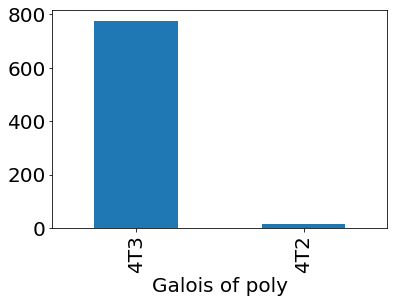

In [45]:
df["Galois of poly"].value_counts().plot.bar()